In [7]:
import tensorflow as tf
from keras import optimizers 
from tensorflow.keras.callbacks import TensorBoard
import time 

NAME="Model-chiffres-1-{}".format(int(time.time()))
                                  
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))


mnist=tf.keras.datasets.mnist #des images de 28*28 de chiffres 
#loading data 
(x_train,y_train), (x_test,y_test) = mnist.load_data()
#Normalizing data  lui construire un echelle  pour faciliter l'apprentissage
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#construire le modéle 
model= tf.keras.models.Sequential()
#ajouter les couches

#1 ére couche qui correspond au inputs  
model.add(tf.keras.layers.Flatten())
#first hidden layer  avec 128 est le nombre de neurones  et la focntion d' activation  est relu 
model.add(tf.keras.layers.Dense(256,activation= tf.nn.relu6))
#second hidden layer 
model.add(tf.keras.layers.Dense(256,activation= tf.nn.relu6))
'''third hidden layer 
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
#forth  hidden layer 
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
'''
#output layer 
model.add(tf.keras.layers.Dense(10,activation= tf.nn.softmax))
          
#training 
optimizer = 'adam' #algorithme d'optimisation assez complex 
loss='sparse_categorical_crossentropy' #le taux d 'erreur'
#loss='binary_crossentropy'
matrics =['accuracy'] 
model.compile(optimizer,loss,matrics)
model.fit(x_train,y_train,epochs=5,callbacks=[tensorboard])
          

    




Epoch 1/5
60000/60000 [==============================] - 26s 432us/step - loss: 0.2230 - acc: 0.9333
Epoch 2/5
60000/60000 [==============================] - 27s 455us/step - loss: 0.0904 - acc: 0.9717
Epoch 3/5
60000/60000 [==============================] - 26s 435us/step - loss: 0.0588 - acc: 0.9814
Epoch 4/5
60000/60000 [==============================] - 26s 430us/step - loss: 0.0433 - acc: 0.9862
Epoch 5/5
60000/60000 [==============================] - 27s 453us/step - loss: 0.0316 - acc: 0.9894


on remarque que 
AVEC 3 LAYERS  fonction d'ctivation est relu6 : 
4 epoch : 
 dans le trainting : 
    loss=0.05
    acc=0.98
 dans le test : 
    loss=0.08 
    acc=0.97
3 epoch : 
  dans le training : 
    loss= 0.07
    acc=0.976 
  dans le test  
    loss=0.08 
    acc=0.97 
DONC 3 epoch est l'idéale ! 

*La normalisation aussi est trés importante ! 

AVEC 4 couches : 
3 epoch : 
dans le training : 
  acc=0.977 
  loss= 0.07 
dans le test : 
   loss= 0.10 (a augmenter par raport a 3 couches  ) 
  acc= 0.96(a diminuer  )

Avec tanh  3 couches et 3 epoch :  relu est mieux 




In [81]:
#test  : calculer la valeur d'erreur et de precision 
val_err, val_acc = model.evaluate(x_test,y_test) # evaluate retur les deux valeurs 
print("valeur d'erreur",val_err)
print("valeur de précision",val_acc)


10000/10000 [==============================] - 1s 84us/step
valeur d'erreur 0.087572653226
valeur de précision 0.9721


9


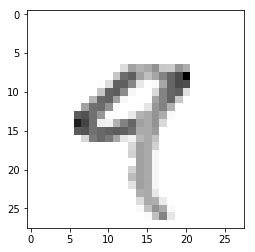

In [55]:
import matplotlib.pyplot as plt 

print(y_train[4])
plt.imshow(x_train[4] , cmap=plt.cm.binary)
plt.show()



In [51]:
model.save('Model_of_numbers_prediction')
new_model= tf.keras.models.load_model('Model_of_numbers_prediction')


In [52]:
predictions= new_model.predict([x_test])

In [53]:
print(predictions)

[[  3.31025909e-08   2.05287520e-08   7.21573997e-07 ...,   9.99997616e-01
    1.29552760e-08   2.78292930e-07]
 [  9.30469302e-09   5.78876992e-04   9.99417901e-01 ...,   6.81159504e-11
    1.64383508e-07   1.43484985e-12]
 [  4.91970877e-06   9.99677896e-01   1.37234138e-05 ...,   1.92164051e-04
    3.64376647e-05   1.09465770e-06]
 ..., 
 [  7.08675918e-09   3.08990096e-08   6.80865309e-10 ...,   4.36856499e-06
    6.81815038e-07   1.58994444e-04]
 [  2.04746393e-05   3.55161592e-06   4.43736354e-07 ...,   5.70997281e-06
    1.47190818e-03   1.41437241e-07]
 [  7.91149333e-08   3.76490350e-09   5.53467032e-08 ...,   3.28732597e-11
    2.56835353e-08   1.34578571e-10]]


In [62]:
import numpy as np 
# visualiser les predictions avec numpy 
print(np.argmax(predictions[60]))

7


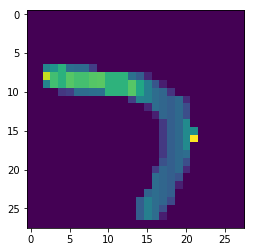

In [61]:
plt.imshow(x_test[60])
plt.show()